## Tasks 4.9 Part 2

#### 1: Create a new notebook, import the necessary analysis and visualization libraries, then import your most up-to-date project data (i.e., the data set with your new customer data from the first part of this task).

#### 2: If you haven’t done so already, follow the instructions in the Exercise to create a bar chart, a histogram, a scatterplot, and a line chart, using a sample subset for the line chart.

#### 3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

- In a markdown cell beneath your histogram, describe what the histogram demonstrates.

#### 4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

#### 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

#### 6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents:

- In a markdown cell beneath your line chart, describe what the line chart shows.

#### 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

- In a markdown cell beneath your scatterplot, describe what the scatterplot shows.

#### 8: Export your visualizations as “.png” files in your relevant project folder.

# Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Importing Data

In [2]:
path = r'C:\Users\maxca\Instacart Basket Analysis'

In [3]:
df_final = pd.read_pickle(os.path.join(path, '02 Data','Prepared Data', 'df_Instacart_Final.pkl'))

In [4]:
df_final.head()

,user_id,First Name,Surnam,Gender,STATE,Age,date_joined,n_dependants,fam_status,income,...,busiest_day,busiest_days,busiest_hours,max_order,loyalty_flag,product_price_mean,spending_flag,order_frequency_mean,order_frequency_flag,exists
0,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Average orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
1,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
2,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Busiest days,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
3,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Regularly busy,Average orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both
4,26711,Deborah,Esquivel,Female,Missouri,48,1/1/2017,3,married,165665,...,Regularly busy,Least busy days,Most orders,8,New Customer,7.988889,Low spender,19.823529,Regular customer,both


In [5]:
#Checking the data types again
df_final.dtypes

user_id                      int64
First Name                  object
Surnam                      object
Gender                      object
STATE                       object
Age                          int64
date_joined                 object
n_dependants                 int64
fam_status                  object
income                       int64
order_id                     int64
number_of_orders             int64
orders_day_of_week           int64
order_hour_of_day            int64
days_since_prior_order     float64
product_id                   int64
add_to_cart_order            int64
reordered                    int64
product_name                object
aisle_id                     int64
department_id                int64
prices                     float64
price_range_loc             object
busiest_day                 object
busiest_days                object
busiest_hours               object
max_order                    int64
loyalty_flag                object
product_price_mean  

#### 3: You need to provide the Instacart senior stakeholders with descriptive findings about sales. Create a histogram of the “order_hour_of_day” column.

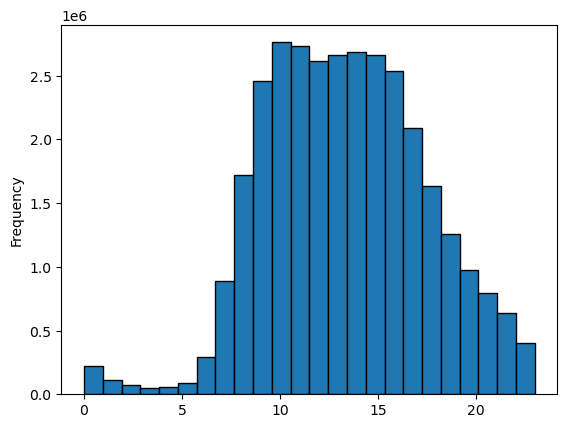

In [13]:
#Creating a Histogramm for 'order_hour_of_day'
hist_order_hour_of_day = df_final['order_hour_of_day'].plot.hist(bins = 24, edgecolor = 'black')

### The histogram shows ous that the orders start to get in around 8 a.m. with a peak at 10 a.m. - This continous troughout 16 a.m.

# Exporting Histogram as hist_order_hour_of_day.png

In [35]:
hist_order_hour_of_day.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_order_hour_of_day.png'))

#### Task 4: The marketing team is curious about the distribution of orders among customers in terms of loyalty. Create a bar chart from the “loyalty_flag” column.

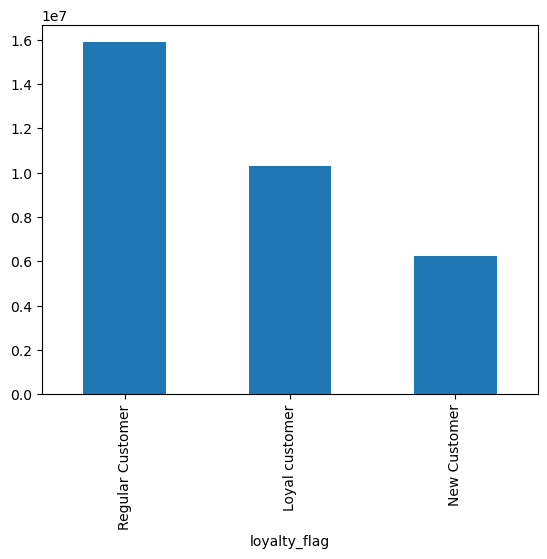

In [36]:
#Creating a Bar chart for the loyality_flag
bar_loyality = df_final['loyality_flag'].value_counts().plot.bar()

### Exporting Bar Chart as bar_loyality.png

In [37]:
bar_loyality.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_loyality.png'))

#### Creating a bar chart for the order frequency in each department for the final analysis

In [6]:
df_final['department_id'].value_counts()

department_id
4     9479291
16    5398747
19    2887550
7     2688123
1     2234743
13    1875369
3     1172428
15    1068058
20    1051249
9      866627
17     738666
12     708927
14     703033
11     447572
18     423802
6      269253
5      153696
8       97716
21      69145
2       36291
10      34573
Name: count, dtype: int64

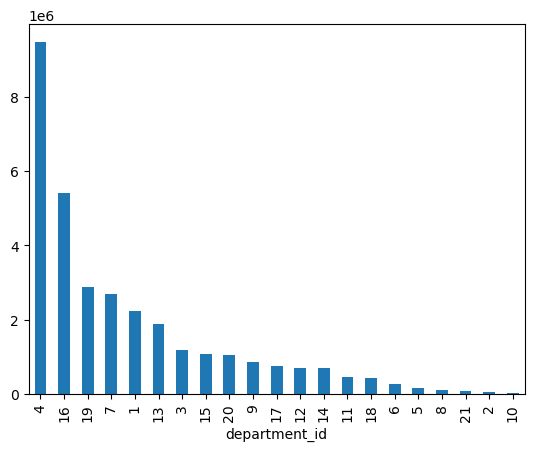

In [7]:
bar_departments = df_final['department_id'].value_counts().plot.bar()

### Exporting bar chart as bar_departments_orders

In [9]:
bar_departments.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_departments_orders.png'))

#### Creating a bar chart for the loyalty_flag and orders_day_of_week in the final analysis

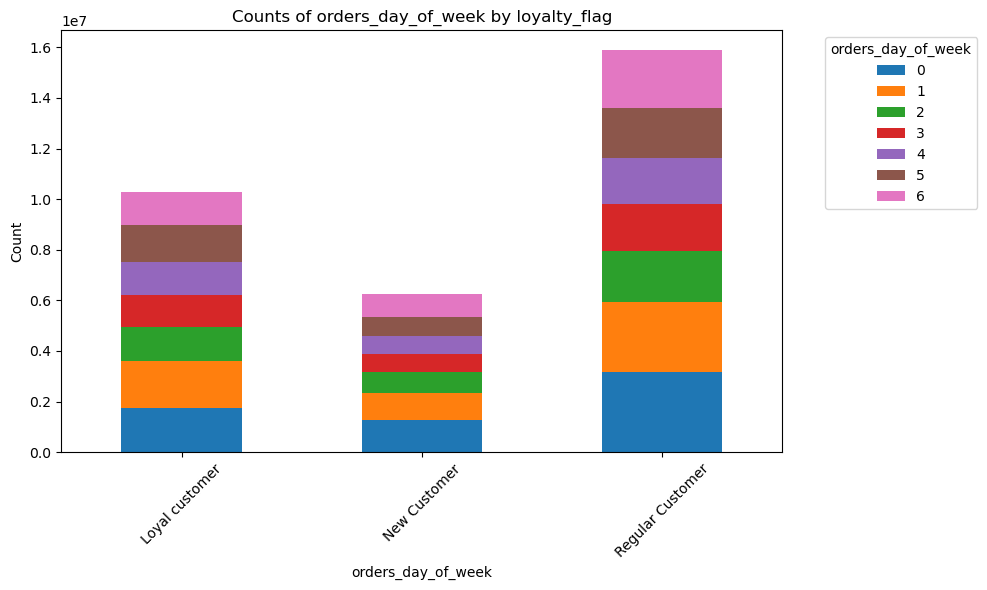

In [10]:
# Count the occurrences of each combination of 'loyalty_flag' and 'orders_day_of_week'
grouped = df_final.groupby(['loyalty_flag', 'orders_day_of_week']).size().unstack(fill_value=0)

# Making the bar chart
bar_loyalty_orders_day_of_week = grouped.plot(kind='bar', stacked=True, figsize=(10, 6))
bar_loyalty_orders_day_of_week.set_ylabel('Count')
bar_loyalty_orders_day_of_week.set_xlabel('orders_day_of_week')
bar_loyalty_orders_day_of_week.set_title('Counts of orders_day_of_week by loyalty_flag')



plt.xticks(rotation=45)
plt.legend(title='orders_day_of_week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

### Exporting bar chart as 'orders_day_of_week by loyalty_flag'

In [11]:
bar_loyalty_orders_day_of_week.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'orders_day_of_week by loyalty_flag.png'))

#### Task 5: Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day. (Hint: To check this, you need to use an accurate sample for your line chart!)

### Sampling 70 to 30 ratio

In [6]:
# Create a list holding True/False values to the thest np.random.rant() <=0.7
np.random.seed(4)
dev = np.random.rand(len(df_final)) <= 0.7

In [7]:
#Store 70% of the sample in the df big
big = df_final[dev]

In [8]:
#Store 30% of the sample in the df small
small = df_final[~dev]

#### Checking if both samples together have the same amount of data as the original 

In [9]:
len(df_final)

32404859

In [10]:
len(big) + len(small)

32404859

### Now we reduce everything to the 2 variables

In [32]:
df_3 = small[['order_hour_of_day', 'prices']]

### Creating the line Chart

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


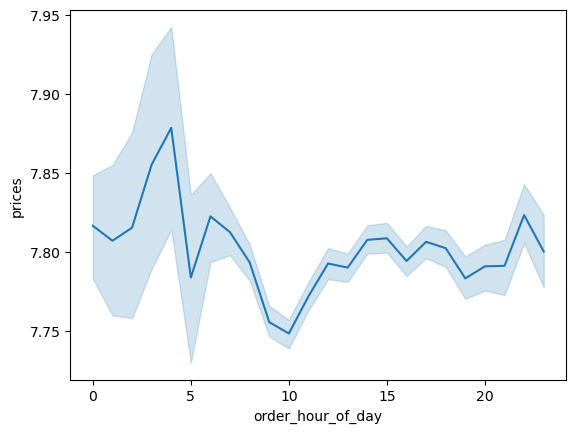

In [34]:
line2 = sns.lineplot (data = df_3, x = 'order_hour_of_day', y = 'prices')

### Exporting Line Chart as line_prices_hourod.png

In [38]:
line2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_prices_hourod.png'))

### Normally we have to check the 70% for consitency in reprasentation, which we skip here because of RAM Issues

#### Task 6: Now that you have information about customers, you need to conduct some exploratory analysis of customer demographics to inform the targeted marketing campaigns. First, determine whether there’s a connection between age and family situation by creating a line chart exploring the connections between age and number of dependents

### Using the small sample again and getting rid of all the other variables

In [40]:
df_4 = small[['fam_status', 'Age']]

D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\Anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


([0, 1, 2, 3],
 [Text(0, 0, 'married'),
  Text(1, 0, 'single'),
  Text(2, 0, 'living with parents and siblings'),
  Text(3, 0, 'divorced/widowed')])

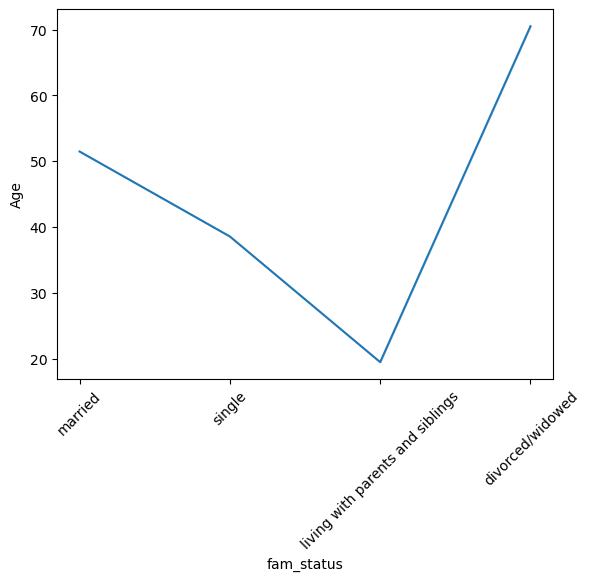

In [44]:
line4Age_Fam = sns.lineplot (data = df_4, x = 'fam_status', y = 'Age')
plt.xticks(rotation=45)

### As we can see married customers are around 53, singels around 40, customers living with parents and siblings are around 20 and divorced/widowed around 70+

### Normally we have to check the 70% for consitency in reprasentation, which we skip here because of RAM Issues

#### I don't think a line chart is the correct visualization since there is no connection between the fam_status. This way it is hard to read.

### Exporting the line chart as line_age_fam

In [45]:
line4Age_Fam.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_fam.png'))

#### Task 7: You’ll also need to explore whether there’s a connection between age and spending power (income). To visualize this relationship, create a scatterplot using the sns.scatterplot() function.

In [11]:
# Creating a new df for the 30% again
df_5 = small[['income', 'Age']]

<Axes: xlabel='Age', ylabel='income'>

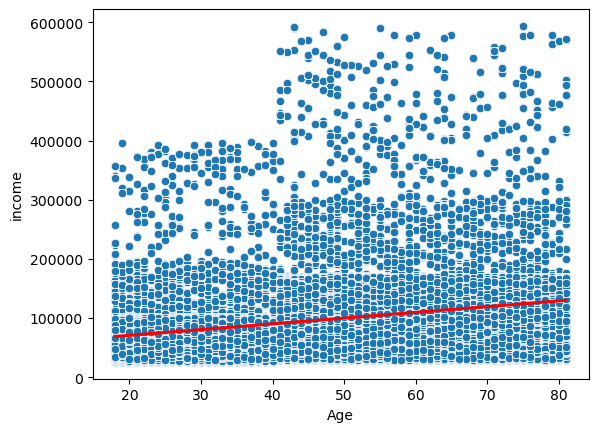

In [13]:
hist_age_income = sns.scatterplot(x = 'Age', y = 'income',data = df_5)
sns.regplot(x='Age', y='income', data=df_5, scatter=False, color = 'red')

### As we can see the income or spending power seems to rise with age, if it's due to outliers or a consistent trend needs to be analysed further.

### Normally we have to check the 70% for consitency in reprasentation, which we skip here because of RAM Issues

# Exporting the histogram as hist_age_income.png

In [14]:
hist_age_income.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'hist_age_income.png'))